<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r12_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r12-good.csv?token=AKVFSOEP2YG4LNN26DOEZZS6X3QWO"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r12-mal.csv?token=AKVFSOGIHJTMBEY5AC2PAL26X3QWY"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [114]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,176,3,2,3,1,4,3,9,29,13,24,8,1,2,1,0.50,8,6,1,6,6,36,6,3,12,12,9,27,27,1
1,177,3,2,4,1,1,5,17,29,13,0,0,1,4,1,0.25,9,5,2,6,10,60,6,4,4,4,20,85,100,1
2,178,3,2,4,2,2,5,17,29,13,0,0,1,4,1,0.25,10,4,3,6,12,72,6,8,16,16,20,85,100,1
3,179,3,2,4,3,2,5,17,29,13,0,0,1,4,1,0.25,11,3,4,6,12,72,6,12,24,24,20,85,100,1
4,180,3,2,4,4,2,5,17,29,13,0,0,1,4,1,0.25,12,2,5,6,10,60,6,16,32,32,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17469,3250544,3,2,4,1,1,5,17,30,14,0,0,10017,5,2,0.40,12,1,1,1,1,1,6,4,4,40068,20,85,100,1
17470,3250545,3,2,4,2,2,5,17,30,14,0,0,10017,5,2,0.40,13,1,1,1,1,1,6,8,16,160272,20,85,100,1
17471,3250546,3,2,4,3,2,5,17,30,14,0,0,10017,5,2,0.40,14,1,1,1,1,1,6,12,24,240408,20,85,100,1
17472,3250547,3,2,4,4,2,5,17,30,14,0,0,10017,5,2,0.40,15,1,1,1,1,1,6,16,32,320544,20,85,100,1


In [115]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,172,3,2,3,1,4,3,9,29,13,24,8,2,2,1,0.50,8,6,1,6,6,36,6,3,12,24,9,27,27,0
1,194,3,2,4,1,1,5,17,29,13,0,0,3,4,1,0.25,8,5,2,6,10,60,6,4,4,12,20,85,100,0
2,195,3,2,4,2,2,5,17,29,13,0,0,3,4,1,0.25,9,4,3,6,12,72,6,8,16,48,20,85,100,0
3,196,3,2,4,3,2,5,17,29,13,0,0,3,4,1,0.25,10,3,4,6,12,72,6,12,24,72,20,85,100,0
4,197,3,2,3,1,4,3,9,29,13,24,8,3,2,1,0.50,11,2,5,6,10,60,6,3,12,36,9,27,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,2009871,3,2,4,1,1,5,17,30,14,0,0,11071,5,2,0.40,13,1,1,1,1,1,6,4,4,44284,20,85,100,0
10864,2009872,3,2,4,2,2,5,17,30,14,0,0,11071,5,2,0.40,14,1,1,1,1,1,6,8,16,177136,20,85,100,0
10865,2009873,3,2,4,3,2,5,17,30,14,0,0,11071,5,2,0.40,15,1,1,1,1,1,6,12,24,265704,20,85,100,0
10866,2009874,3,2,4,4,2,5,17,30,14,0,0,11071,5,2,0.40,16,1,1,1,1,1,6,16,32,354272,20,85,100,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [117]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [119]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,172,3,2,3,1,4,3,9,29,13,24,8,2,2,1,0.50,8,6,1,6,6,36,6,3,12,24,9,27,27,0
1,176,3,2,3,1,4,3,9,29,13,24,8,1,2,1,0.50,8,6,1,6,6,36,6,3,12,12,9,27,27,1
2,177,3,2,4,1,1,5,17,29,13,0,0,1,4,1,0.25,9,5,2,6,10,60,6,4,4,4,20,85,100,1
3,178,3,2,4,2,2,5,17,29,13,0,0,1,4,1,0.25,10,4,3,6,12,72,6,8,16,16,20,85,100,1
4,179,3,2,4,3,2,5,17,29,13,0,0,1,4,1,0.25,11,3,4,6,12,72,6,12,24,24,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28337,3250544,3,2,4,1,1,5,17,30,14,0,0,10017,5,2,0.40,12,1,1,1,1,1,6,4,4,40068,20,85,100,1
28338,3250545,3,2,4,2,2,5,17,30,14,0,0,10017,5,2,0.40,13,1,1,1,1,1,6,8,16,160272,20,85,100,1
28339,3250546,3,2,4,3,2,5,17,30,14,0,0,10017,5,2,0.40,14,1,1,1,1,1,6,12,24,240408,20,85,100,1
28340,3250547,3,2,4,4,2,5,17,30,14,0,0,10017,5,2,0.40,15,1,1,1,1,1,6,16,32,320544,20,85,100,1


In [120]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,-0.021208,-0.012036,0.037411,0.001563,-0.002515,-0.029045,-0.026617,-0.022931,-0.025661,0.023176,0.024560,0.843746,-0.039547,-0.020397,0.003722,0.023541,-0.341530,-0.341526,-0.413164,-0.317504,-0.239838,-0.030872,0.014090,0.012012,0.470645,0.004185,-0.028175,-0.018134,0.400850
outport,-0.021208,1.000000,-0.228651,-0.017749,0.091264,-0.147218,0.714067,0.733229,0.874155,0.878403,-0.819650,-0.808065,-0.086570,0.469859,-0.479296,-0.718380,-0.675217,-0.099964,-0.011722,-0.067557,-0.080418,-0.090466,0.840391,-0.015304,-0.009750,-0.060149,0.681659,0.724076,0.776146,0.109249
inport,-0.012036,-0.228651,1.000000,-0.364994,0.060375,-0.097391,0.269733,0.165559,-0.476168,-0.413368,-0.248075,-0.297071,-0.036338,0.488525,0.784073,0.782902,0.205384,-0.024829,-0.109962,-0.081532,-0.100431,-0.102803,0.317451,-0.096512,-0.097921,-0.097603,-0.054145,0.229146,0.161978,0.038629
cache_coherence_type,0.037411,-0.017749,-0.364994,1.000000,-0.002483,0.004005,-0.417827,-0.404544,0.001004,-0.018056,0.115444,0.142878,0.058960,-0.085558,-0.154128,-0.225524,-0.119868,0.004028,0.002281,0.003816,0.022233,0.035385,-0.252596,0.261270,0.266801,0.233902,0.461894,-0.413929,-0.091755,-0.019163
flit_id,0.001563,0.091264,0.060375,-0.002483,1.000000,0.124962,0.281101,0.283918,0.015130,0.016132,-0.119836,-0.107268,-0.011263,0.117160,-0.001003,-0.066562,0.317457,-0.052005,0.085327,0.020156,0.003597,-0.003855,0.122405,0.944149,0.882910,0.624246,0.272261,0.283159,0.307188,0.025517
flit_type,-0.002515,-0.147218,-0.097391,0.004005,0.124962,1.000000,-0.453444,-0.457989,-0.024406,-0.026023,0.193308,0.173034,0.018168,-0.188991,0.001618,0.107372,0.321449,-0.025261,0.077179,0.031404,0.019440,0.023243,-0.197452,0.118695,0.387151,0.280579,-0.439185,-0.456764,-0.495527,-0.041162
vnet,-0.029045,0.714067,0.269733,-0.417827,0.281101,-0.453444,1.000000,0.986157,0.532181,0.561873,-0.854427,-0.847269,-0.100629,0.646592,-0.074073,-0.276016,-0.457645,-0.082304,-0.036039,-0.071583,-0.095986,-0.112435,0.849685,0.059816,-0.032034,-0.086953,0.612813,0.997817,0.943032,0.118361
vc,-0.026617,0.733229,0.165559,-0.404544,0.283918,-0.457989,0.986157,1.000000,0.568442,0.590748,-0.828418,-0.814581,-0.095613,0.598107,-0.154706,-0.360952,-0.460859,-0.079404,-0.021599,-0.061094,-0.082114,-0.098259,0.809692,0.074066,-0.023423,-0.077450,0.610852,0.994954,0.932723,0.114548
src_ni,-0.022931,0.874155,-0.476168,0.001004,0.015130,-0.024406,0.532181,0.568442,1.000000,0.995702,-0.607172,-0.584822,-0.069091,0.233214,-0.619642,-0.761158,-0.695031,-0.077571,0.028277,-0.029817,-0.037818,-0.048734,0.630376,-0.051103,-0.023880,-0.059260,0.520407,0.548393,0.583659,0.074015
src_router,-0.025661,0.878403,-0.413368,-0.018056,0.016132,-0.026023,0.561873,0.590748,0.995702,1.000000,-0.643812,-0.623972,-0.072719,0.307122,-0.545421,-0.707622,-0.686666,-0.080525,0.022887,-0.034864,-0.044595,-0.056218,0.670178,-0.062049,-0.031770,-0.067620,0.532815,0.575243,0.609223,0.075016


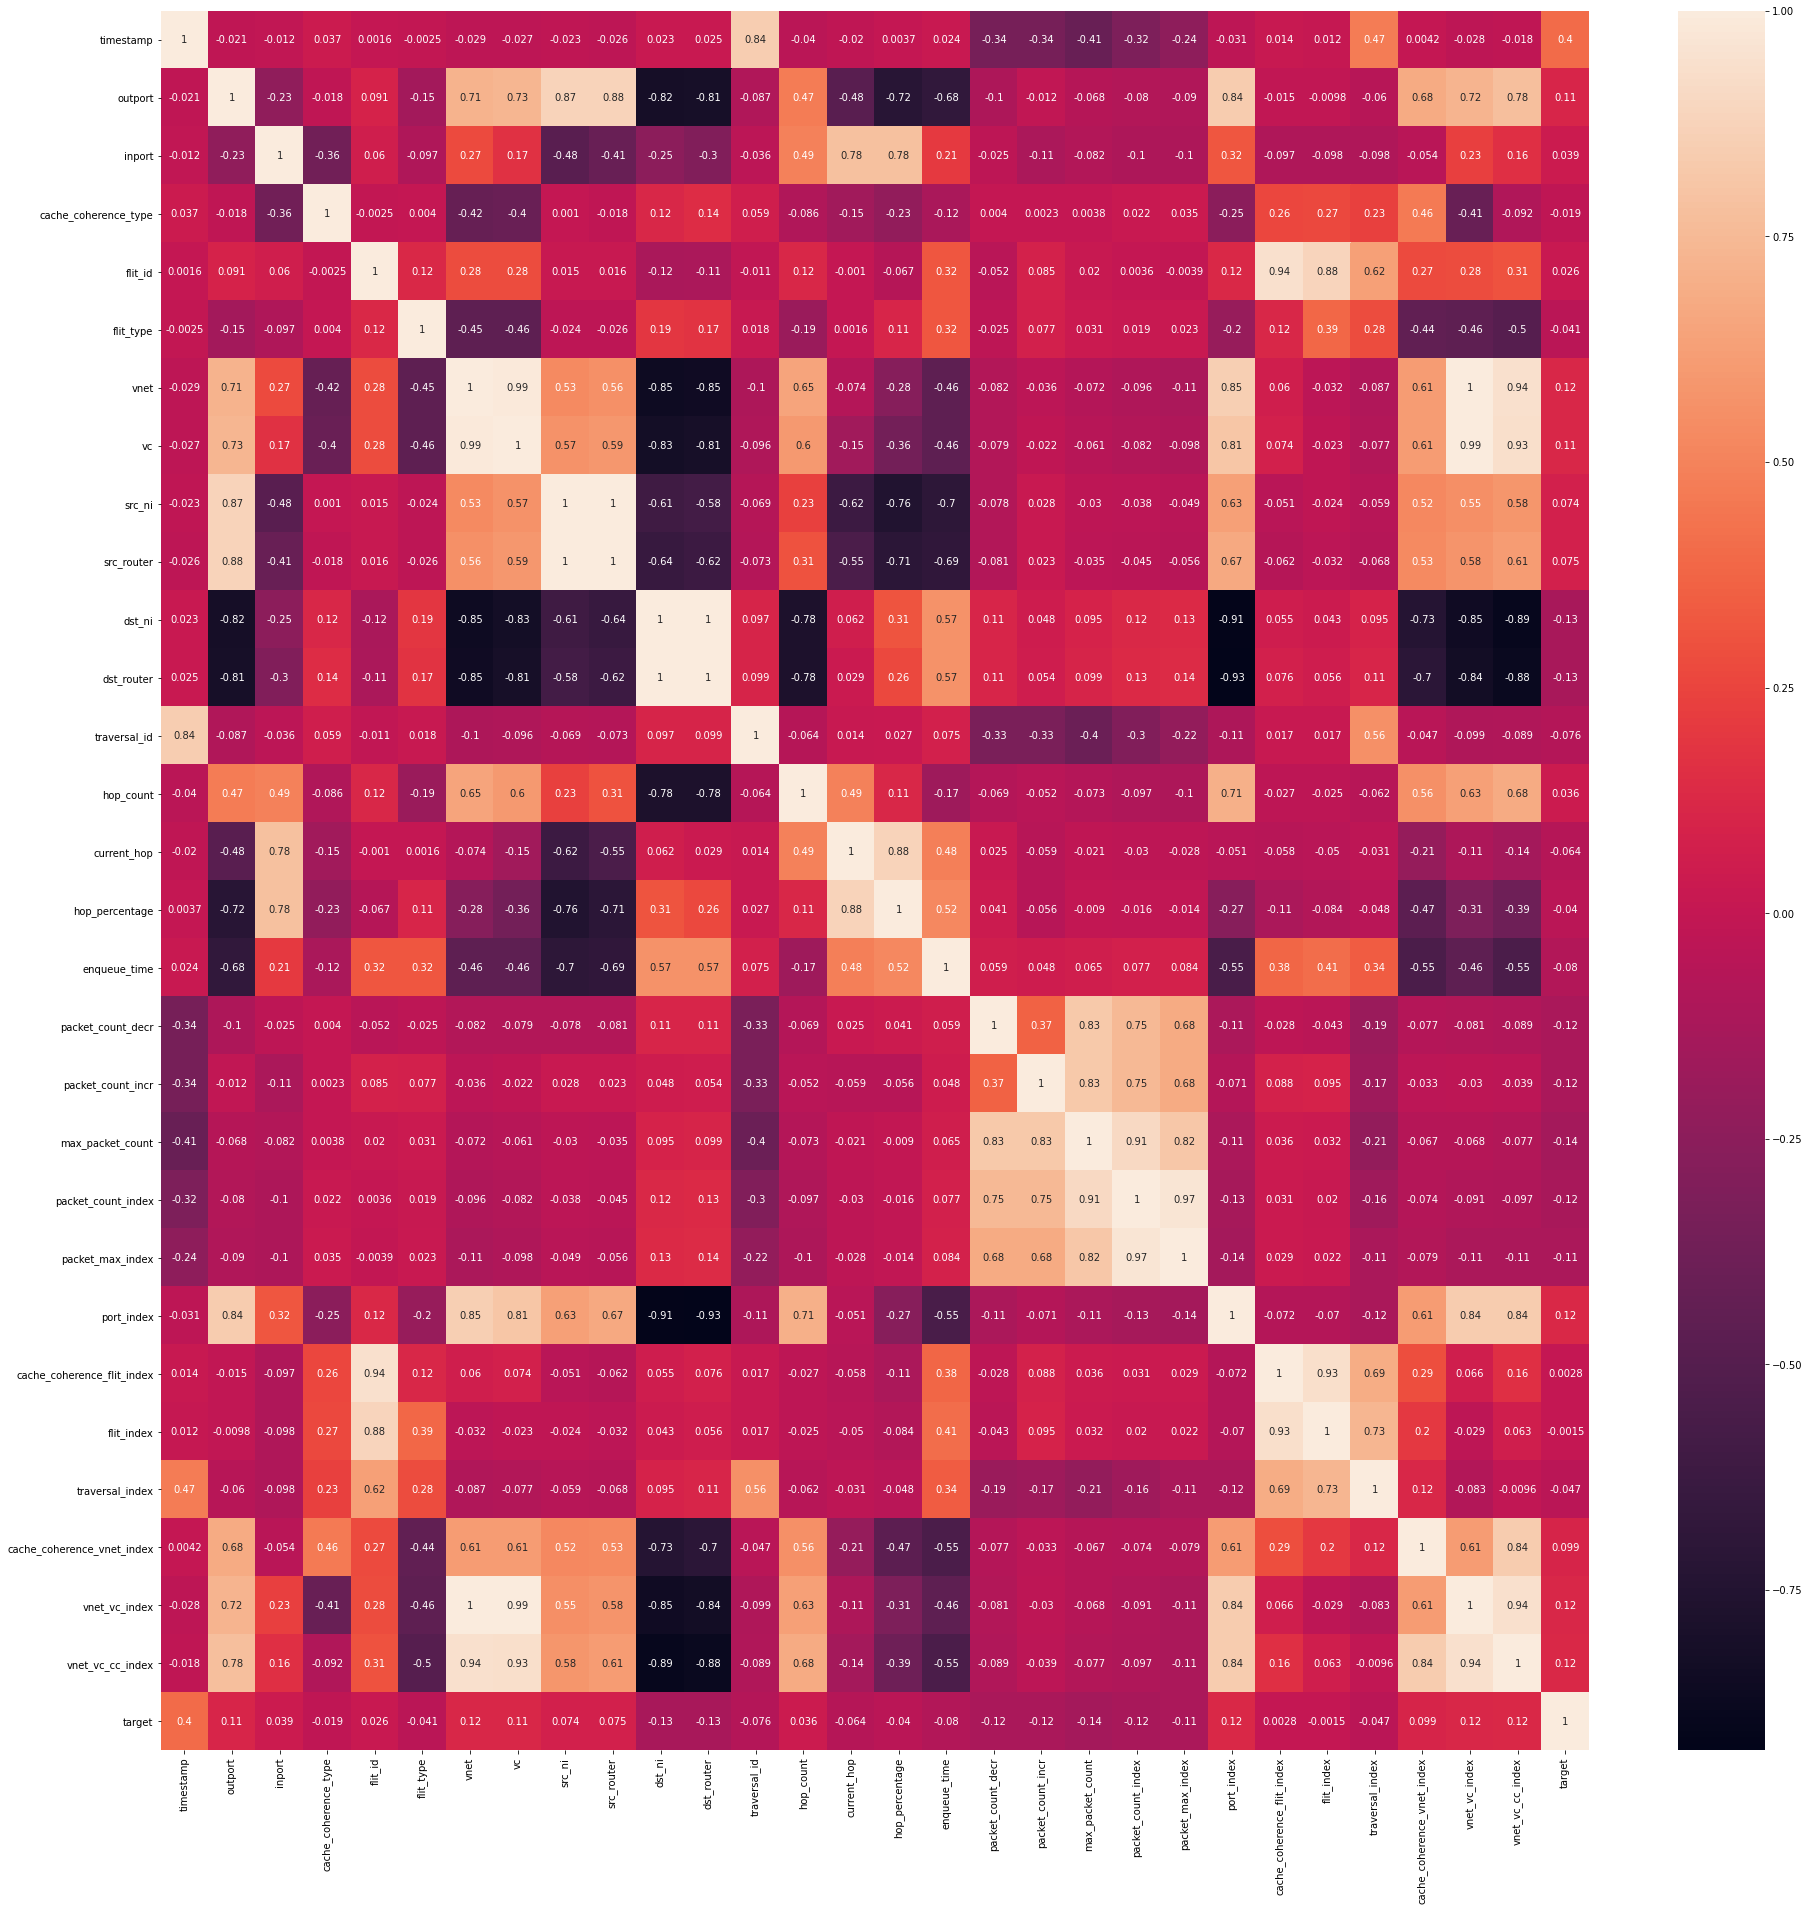

In [121]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [122]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,3,2,3,1,4,3,9,24,8,2,2,1,0.50,8,6,1,6,6,36,6,3,12,24,9,27,27
1,3,2,3,1,4,3,9,24,8,1,2,1,0.50,8,6,1,6,6,36,6,3,12,12,9,27,27
2,3,2,4,1,1,5,17,0,0,1,4,1,0.25,9,5,2,6,10,60,6,4,4,4,20,85,100
3,3,2,4,2,2,5,17,0,0,1,4,1,0.25,10,4,3,6,12,72,6,8,16,16,20,85,100
4,3,2,4,3,2,5,17,0,0,1,4,1,0.25,11,3,4,6,12,72,6,12,24,24,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28337,3,2,4,1,1,5,17,0,0,10017,5,2,0.40,12,1,1,1,1,1,6,4,4,40068,20,85,100
28338,3,2,4,2,2,5,17,0,0,10017,5,2,0.40,13,1,1,1,1,1,6,8,16,160272,20,85,100
28339,3,2,4,3,2,5,17,0,0,10017,5,2,0.40,14,1,1,1,1,1,6,12,24,240408,20,85,100
28340,3,2,4,4,2,5,17,0,0,10017,5,2,0.40,15,1,1,1,1,1,6,16,32,320544,20,85,100


In [123]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.666667,0.333333,0.00,1.000000,0.0,0.0,0.8,0.571429,0.000090,0.00,0.2,0.50,0.088889,0.3125,0.0000,0.3125,0.0625,0.025436,1.0,0.068966,0.093023,0.000020,0.333333,0.0,0.197802
1,1.0,0.666667,0.333333,0.00,1.000000,0.0,0.0,0.8,0.571429,0.000000,0.00,0.2,0.50,0.088889,0.3125,0.0000,0.3125,0.0625,0.025436,1.0,0.068966,0.093023,0.000008,0.333333,0.0,0.197802
2,1.0,0.666667,0.500000,0.00,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.50,0.2,0.25,0.111111,0.2500,0.0625,0.3125,0.1125,0.042878,1.0,0.103448,0.000000,0.000000,0.944444,1.0,1.000000
3,1.0,0.666667,0.500000,0.25,0.333333,1.0,1.0,0.0,0.000000,0.000000,0.50,0.2,0.25,0.133333,0.1875,0.1250,0.3125,0.1375,0.051599,1.0,0.241379,0.139535,0.000012,0.944444,1.0,1.000000
4,1.0,0.666667,0.500000,0.50,0.333333,1.0,1.0,0.0,0.000000,0.000000,0.50,0.2,0.25,0.155556,0.1250,0.1875,0.3125,0.1375,0.051599,1.0,0.379310,0.232558,0.000020,0.944444,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28337,1.0,0.666667,0.500000,0.00,0.000000,1.0,1.0,0.0,0.000000,0.904788,0.75,0.4,0.40,0.177778,0.0000,0.0000,0.0000,0.0000,0.000000,1.0,0.103448,0.000000,0.040220,0.944444,1.0,1.000000
28338,1.0,0.666667,0.500000,0.25,0.333333,1.0,1.0,0.0,0.000000,0.904788,0.75,0.4,0.40,0.200000,0.0000,0.0000,0.0000,0.0000,0.000000,1.0,0.241379,0.139535,0.160893,0.944444,1.0,1.000000
28339,1.0,0.666667,0.500000,0.50,0.333333,1.0,1.0,0.0,0.000000,0.904788,0.75,0.4,0.40,0.222222,0.0000,0.0000,0.0000,0.0000,0.000000,1.0,0.379310,0.232558,0.241341,0.944444,1.0,1.000000
28340,1.0,0.666667,0.500000,0.75,0.333333,1.0,1.0,0.0,0.000000,0.904788,0.75,0.4,0.40,0.244444,0.0000,0.0000,0.0000,0.0000,0.000000,1.0,0.517241,0.325581,0.321790,0.944444,1.0,1.000000


In [124]:
train_X[train_X.duplicated()].shape

(315, 26)

In [125]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.228651,-0.017749,0.091264,-0.147218,0.714067,0.733229,-0.819650,-0.808065,-0.086570,0.469859,-0.479296,-0.718380,-0.675217,-0.099964,-0.011722,-0.067557,-0.080418,-0.090466,0.840391,-0.015304,-0.009750,-0.060149,0.681659,0.724076,0.776146,0.109249
inport,-0.228651,1.000000,-0.364994,0.060375,-0.097391,0.269733,0.165559,-0.248075,-0.297071,-0.036338,0.488525,0.784073,0.782902,0.205384,-0.024829,-0.109962,-0.081532,-0.100431,-0.102803,0.317451,-0.096512,-0.097921,-0.097603,-0.054145,0.229146,0.161978,0.038629
cache_coherence_type,-0.017749,-0.364994,1.000000,-0.002483,0.004005,-0.417827,-0.404544,0.115444,0.142878,0.058960,-0.085558,-0.154128,-0.225524,-0.119868,0.004028,0.002281,0.003816,0.022233,0.035385,-0.252596,0.261270,0.266801,0.233902,0.461894,-0.413929,-0.091755,-0.019163
flit_id,0.091264,0.060375,-0.002483,1.000000,0.124962,0.281101,0.283918,-0.119836,-0.107268,-0.011263,0.117160,-0.001003,-0.066562,0.317457,-0.052005,0.085327,0.020156,0.003597,-0.003855,0.122405,0.944149,0.882910,0.624246,0.272261,0.283159,0.307188,0.025517
flit_type,-0.147218,-0.097391,0.004005,0.124962,1.000000,-0.453444,-0.457989,0.193308,0.173034,0.018168,-0.188991,0.001618,0.107372,0.321449,-0.025261,0.077179,0.031404,0.019440,0.023243,-0.197452,0.118695,0.387151,0.280579,-0.439185,-0.456764,-0.495527,-0.041162
vnet,0.714067,0.269733,-0.417827,0.281101,-0.453444,1.000000,0.986157,-0.854427,-0.847269,-0.100629,0.646592,-0.074073,-0.276016,-0.457645,-0.082304,-0.036039,-0.071583,-0.095986,-0.112435,0.849685,0.059816,-0.032034,-0.086953,0.612813,0.997817,0.943032,0.118361
vc,0.733229,0.165559,-0.404544,0.283918,-0.457989,0.986157,1.000000,-0.828418,-0.814581,-0.095613,0.598107,-0.154706,-0.360952,-0.460859,-0.079404,-0.021599,-0.061094,-0.082114,-0.098259,0.809692,0.074066,-0.023423,-0.077450,0.610852,0.994954,0.932723,0.114548
dst_ni,-0.819650,-0.248075,0.115444,-0.119836,0.193308,-0.854427,-0.828418,1.000000,0.996364,0.097443,-0.777360,0.062305,0.310413,0.568980,0.108465,0.048441,0.094909,0.121599,0.133135,-0.913369,0.055485,0.042705,0.094586,-0.733710,-0.846915,-0.894211,-0.126222
dst_router,-0.808065,-0.297071,0.142878,-0.107268,0.173034,-0.847269,-0.814581,0.996364,1.000000,0.098866,-0.778097,0.029023,0.264035,0.567110,0.110187,0.054274,0.099478,0.127336,0.138798,-0.927797,0.076323,0.056452,0.105534,-0.702860,-0.837073,-0.876319,-0.125274
traversal_id,-0.086570,-0.036338,0.058960,-0.011263,0.018168,-0.100629,-0.095613,0.097443,0.098866,1.000000,-0.063621,0.014256,0.026545,0.074771,-0.327351,-0.327337,-0.396005,-0.296265,-0.215578,-0.106278,0.017175,0.016563,0.560759,-0.046954,-0.098967,-0.088702,-0.075691


Principal Component Analysis

In [126]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[ 1.28714523, -0.63291808, -0.22213635,  0.59577193,  0.7960345 ,
         0.43542416],
       [ 1.28714269, -0.63292438, -0.22213573,  0.59576967,  0.79611424,
         0.43539387],
       [-0.80324087, -0.66891664, -0.13886889, -0.3259275 ,  0.43828652,
        -0.24847764],
       ...,
       [-0.8003497 ,  0.02992093,  0.14504825, -0.01055424, -0.41864355,
         0.1281657 ],
       [-0.81602665,  0.3243821 ,  0.17197463, -0.00695553, -0.41706579,
         0.11420756],
       [-0.78886753,  0.82454733,  0.20547944,  0.24069981, -0.38639827,
         0.25818476]])

In [127]:
pca.explained_variance_ratio_

array([0.59534696, 0.11960095, 0.09856262, 0.06373044, 0.04160674,
       0.03624776])

Text(0, 0.5, 'Variance')

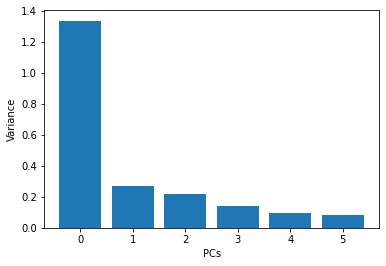

In [128]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [129]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5
0,1.287145,-0.632918,-0.222136,0.595772,0.796034,0.435424
1,1.287143,-0.632924,-0.222136,0.595770,0.796114,0.435394
2,-0.803241,-0.668917,-0.138869,-0.325928,0.438287,-0.248478
3,-0.786622,-0.322268,-0.116484,-0.120834,0.537269,-0.120336
4,-0.803476,-0.044544,-0.089761,-0.121911,0.560269,-0.139090
...,...,...,...,...,...,...
28337,-0.802734,-0.636827,0.095560,-0.227120,-0.484625,0.005162
28338,-0.784673,-0.264540,0.118122,-0.014153,-0.420221,0.142124
28339,-0.800350,0.029921,0.145048,-0.010554,-0.418644,0.128166
28340,-0.816027,0.324382,0.171975,-0.006956,-0.417066,0.114208


In [130]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,target
0,1.000000e+00,-1.798486e-14,-7.674706e-15,-2.161590e-15,2.029059e-16,5.378914e-16,-0.125800
1,-1.798486e-14,1.000000e+00,-7.219002e-16,-2.524423e-16,-2.645984e-16,-1.431641e-15,-0.005957
2,-7.674706e-15,-7.219002e-16,1.000000e+00,1.168268e-15,-9.155402e-16,-2.479284e-15,-0.013766
3,-2.161590e-15,-2.524423e-16,1.168268e-15,1.000000e+00,-4.170278e-16,-1.013684e-15,0.007765
4,2.029059e-16,-2.645984e-16,-9.155402e-16,-4.170278e-16,1.000000e+00,1.313059e-15,0.036201
5,5.378914e-16,-1.431641e-15,-2.479284e-15,-1.013684e-15,1.313059e-15,1.000000e+00,-0.004844
target,-1.257999e-01,-5.956651e-03,-1.376553e-02,7.764860e-03,3.620070e-02,-4.843726e-03,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

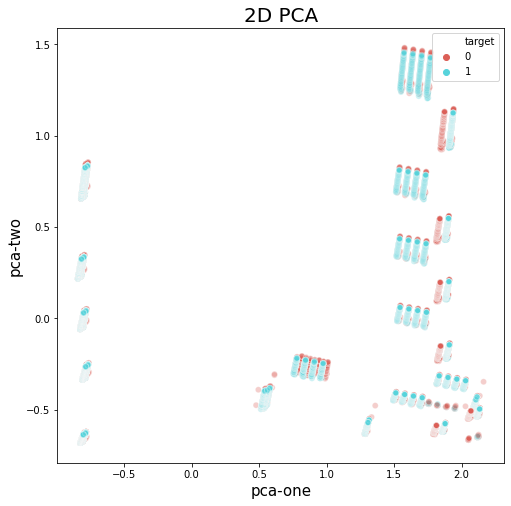

In [132]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

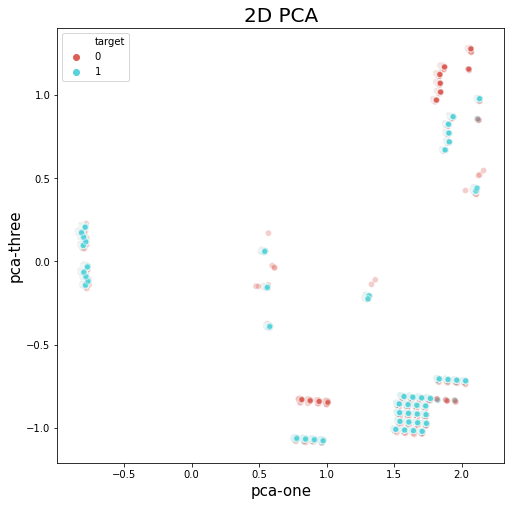

In [133]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

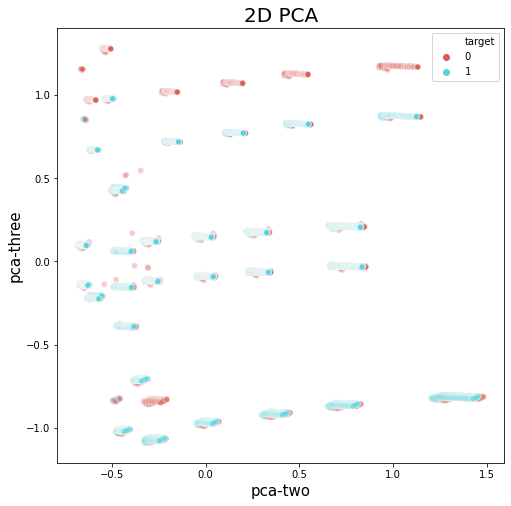

In [134]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

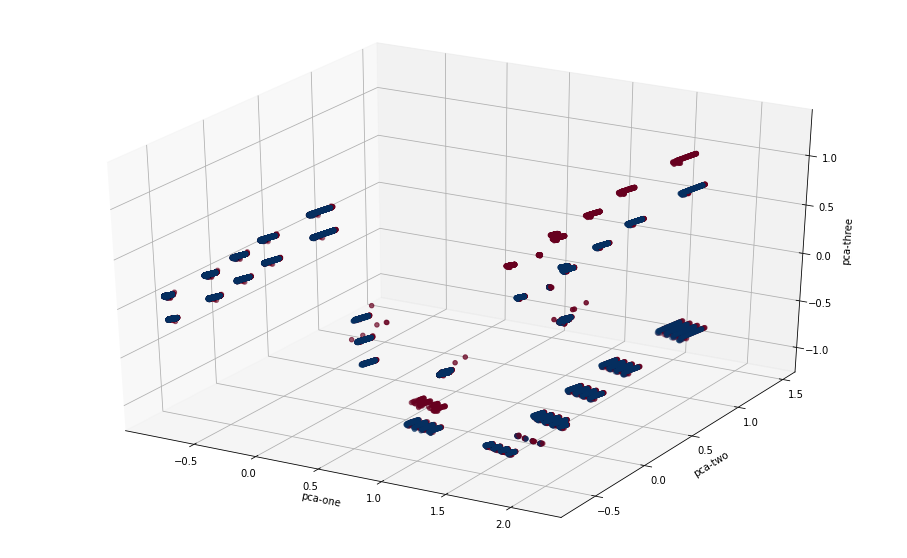

In [135]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

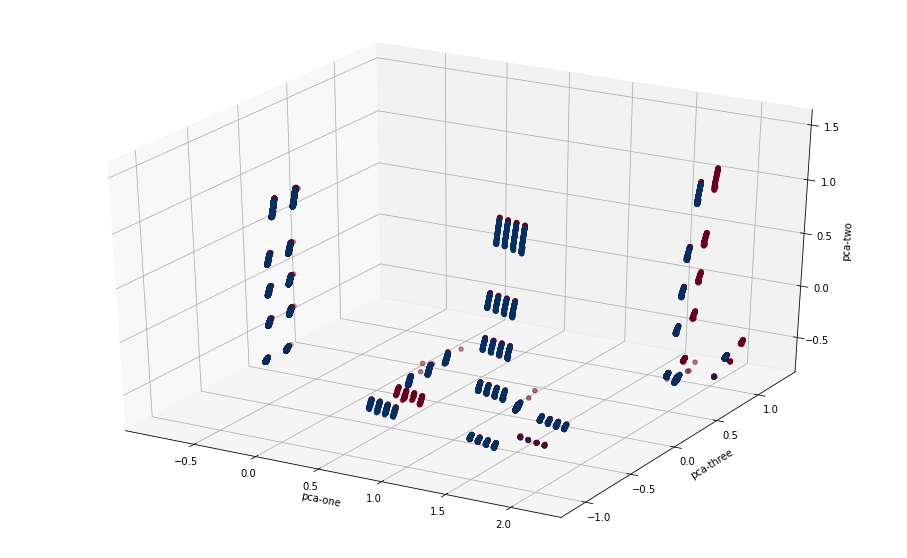

In [136]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

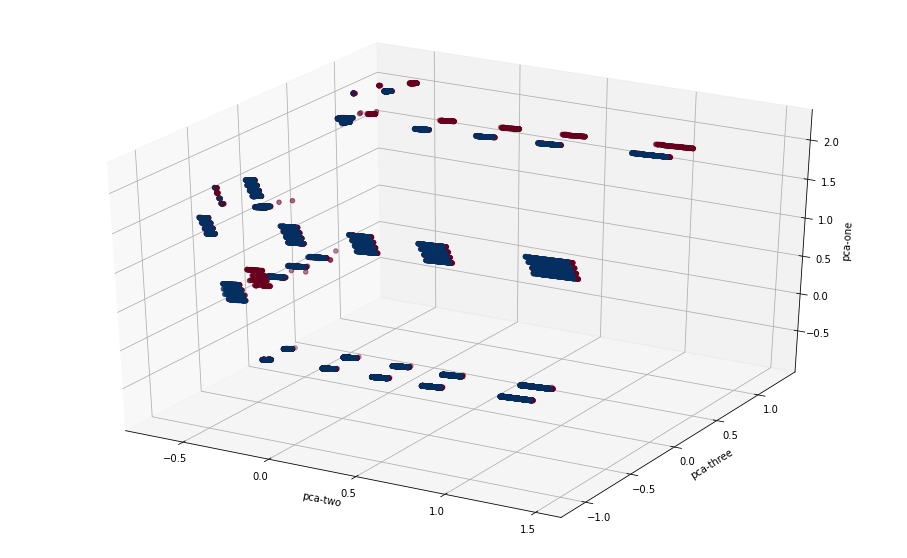

In [137]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [138]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 78.70515275001526 seconds


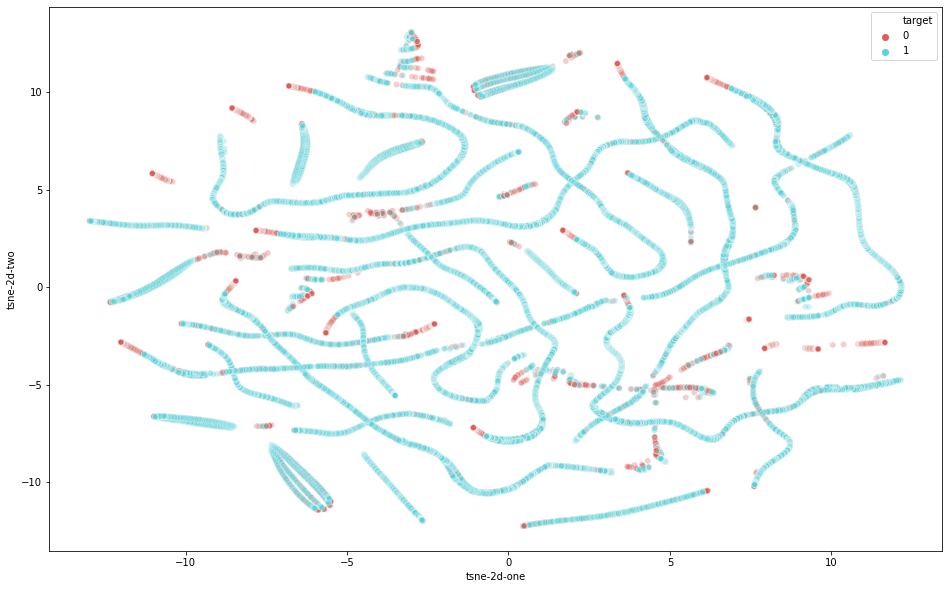

In [139]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

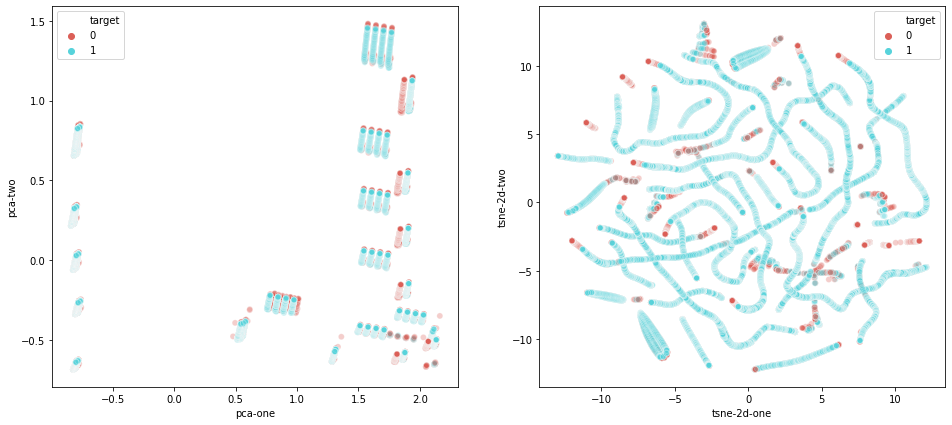

In [140]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [141]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 74.80844759941101 seconds


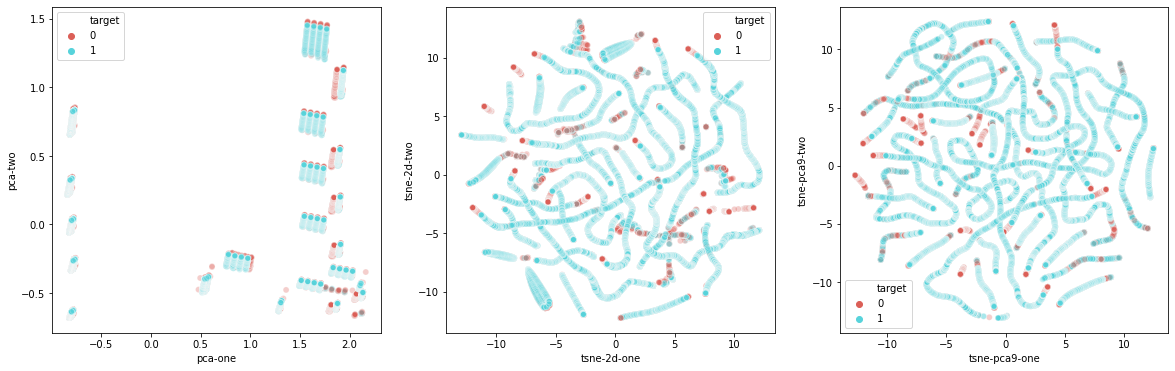

In [142]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [144]:
train_Y = df['target']
train_Y.value_counts()

1    17474
0    10868
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs       Score
7                       dst_ni  255.870814
8                   dst_router  241.768447
16            max_packet_count  177.857129
5                         vnet  108.773273
24               vnet_vc_index   98.446589
19                  port_index   96.057212
17          packet_count_index   92.247315
15           packet_count_incr   89.174734
14           packet_count_decr   88.686211
6                           vc   84.979793
18            packet_max_index   72.602336
0                      outport   39.672873
25            vnet_vc_cc_index   39.658160
9                 traversal_id   19.993592
13                enqueue_time   18.205334
11                 current_hop   12.694881
23  cache_coherence_vnet_index   11.899920


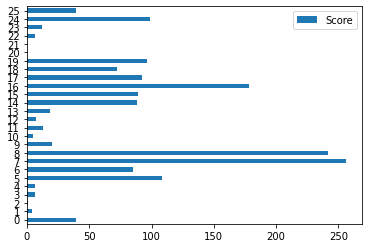

In [147]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [150]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 67.00039694791161
Test Prediction  66.34327041806316


In [152]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
8,dst_router,15.362489
12,hop_percentage,9.465536
0,outport,9.211179
18,packet_max_index,3.332793
1,inport,2.920913
13,enqueue_time,2.667939
3,flit_id,2.115463
2,cache_coherence_type,1.411872
23,cache_coherence_vnet_index,1.364819
25,vnet_vc_cc_index,0.763356


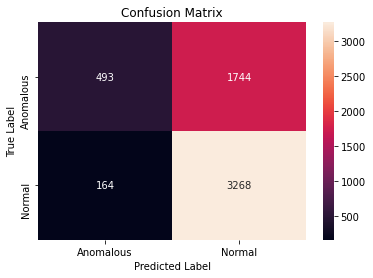

In [153]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.22      0.34      2237
           1       0.65      0.95      0.77      3432

    accuracy                           0.66      5669
   macro avg       0.70      0.59      0.56      5669
weighted avg       0.69      0.66      0.60      5669



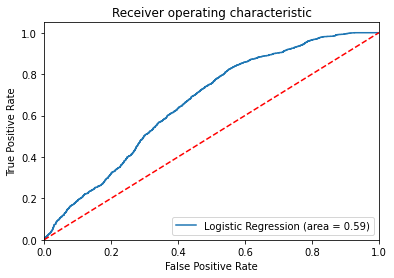

In [155]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [156]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [158]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 77.90764345256473
Test Prediction  66.25507144117128


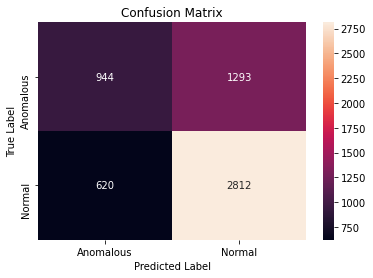

In [159]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [160]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.60      0.42      0.50      2237
           1       0.69      0.82      0.75      3432

    accuracy                           0.66      5669
   macro avg       0.64      0.62      0.62      5669
weighted avg       0.65      0.66      0.65      5669



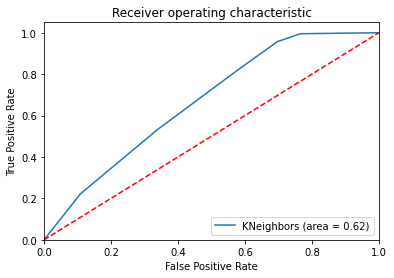

In [161]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [163]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [165]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 61.39902086181802
Test Prediction Score 60.94549303228083


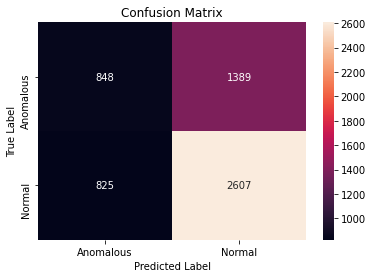

In [166]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [167]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.51      0.38      0.43      2237
           1       0.65      0.76      0.70      3432

    accuracy                           0.61      5669
   macro avg       0.58      0.57      0.57      5669
weighted avg       0.59      0.61      0.60      5669



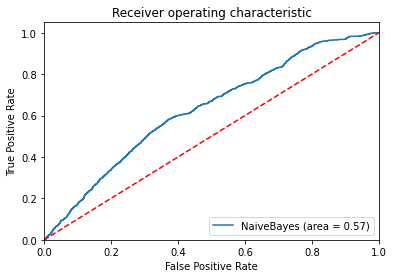

In [168]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [170]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 18138 samples, validate on 4535 samples
Epoch 1/10
18138/18138 [==============================] - 1s 41us/step - loss: 0.2404 - accuracy: 0.6301 - val_loss: 0.2343 - val_accuracy: 0.6366
Epoch 2/10
18138/18138 [==============================] - 1s 37us/step - loss: 0.2310 - accuracy: 0.6433 - val_loss: 0.2274 - val_accuracy: 0.6525
Epoch 3/10
18138/18138 [==============================] - 1s 37us/step - loss: 0.2260 - accuracy: 0.6521 - val_loss: 0.2232 - val_accuracy: 0.6587
Epoch 4/10
18138/18138 [==============================] - 1s 36us/step - loss: 0.2225 - accuracy: 0.6589 - val_loss: 0.2205 - val_accuracy: 0.6549
Epoch 5/10
18138/18138 [==============================] - 1s 36us/step - loss: 0.2202 - accuracy: 0.6589 - val_loss: 0.2185 - val_accuracy: 0.6600
Epoch 6/10
18138/18138 [==============================] - 1s 37us/step - loss: 0.2187 - accuracy: 0.6598 - val_loss: 0.2171 - val_accuracy: 0.6666
Epoch 7/10
18138/18138 [==============================] - 1s 37us/ste

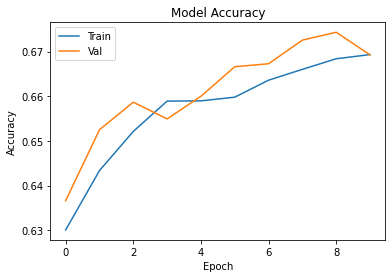

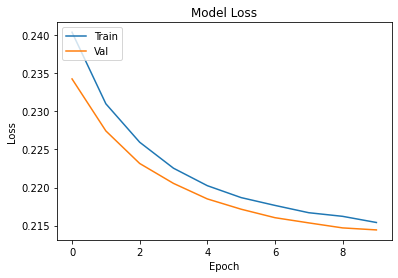

In [171]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [172]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.11%


3-Layer Neural Network

In [173]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 18138 samples, validate on 4535 samples
Epoch 1/15
18138/18138 [==============================] - 1s 44us/step - loss: 0.2436 - accuracy: 0.6151 - val_loss: 0.2380 - val_accuracy: 0.6181
Epoch 2/15
18138/18138 [==============================] - 1s 40us/step - loss: 0.2362 - accuracy: 0.6191 - val_loss: 0.2351 - val_accuracy: 0.6174
Epoch 3/15
18138/18138 [==============================] - 1s 40us/step - loss: 0.2343 - accuracy: 0.6220 - val_loss: 0.2340 - val_accuracy: 0.6205
Epoch 4/15
18138/18138 [==============================] - 1s 40us/step - loss: 0.2335 - accuracy: 0.6235 - val_loss: 0.2334 - val_accuracy: 0.6198
Epoch 5/15
18138/18138 [==============================] - 1s 41us/step - loss: 0.2329 - accuracy: 0.6245 - val_loss: 0.2328 - val_accuracy: 0.6223
Epoch 6/15
18138/18138 [==============================] - 1s 40us/step - loss: 0.2324 - accuracy: 0.6244 - val_loss: 0.2323 - val_accuracy: 0.6214
Epoch 7/15
18138/18138 [==============================] - 1s 41us/ste

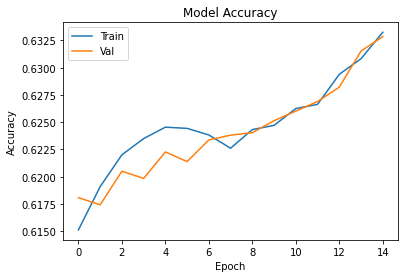

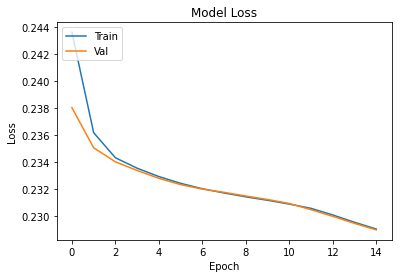

In [174]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [175]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 61.65%


4-Layer Neural Network



In [176]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 18138 samples, validate on 4535 samples
Epoch 1/30
18138/18138 [==============================] - 1s 42us/step - loss: 0.2430 - accuracy: 0.6193 - val_loss: 0.2395 - val_accuracy: 0.6174
Epoch 2/30
18138/18138 [==============================] - 1s 37us/step - loss: 0.2374 - accuracy: 0.6198 - val_loss: 0.2372 - val_accuracy: 0.6174
Epoch 3/30
18138/18138 [==============================] - 1s 38us/step - loss: 0.2361 - accuracy: 0.6198 - val_loss: 0.2366 - val_accuracy: 0.6174
Epoch 4/30
18138/18138 [==============================] - 1s 37us/step - loss: 0.2357 - accuracy: 0.6198 - val_loss: 0.2364 - val_accuracy: 0.6174
Epoch 5/30
18138/18138 [==============================] - 1s 38us/step - loss: 0.2356 - accuracy: 0.6198 - val_loss: 0.2364 - val_accuracy: 0.6174
Epoch 6/30
18138/18138 [==============================] - 1s 37us/step - loss: 0.2355 - accuracy: 0.6198 - val_loss: 0.2364 - val_accuracy: 0.6174
Epoch 7/30
18138/18138 [==============================] - 1s 37us/ste

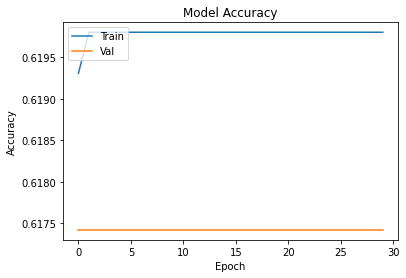

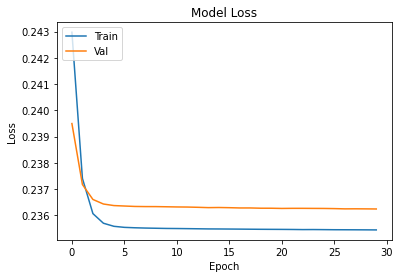

In [177]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [178]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 60.54%


5-Layer Neural Network Optimized

In [179]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 18138 samples, validate on 4535 samples
Epoch 1/100
18138/18138 [==============================] - 2s 101us/step - loss: 0.2242 - accuracy: 0.6424 - val_loss: 0.2181 - val_accuracy: 0.6558
Epoch 2/100
18138/18138 [==============================] - 1s 68us/step - loss: 0.2159 - accuracy: 0.6637 - val_loss: 0.2149 - val_accuracy: 0.6611
Epoch 3/100
18138/18138 [==============================] - 1s 69us/step - loss: 0.2122 - accuracy: 0.6730 - val_loss: 0.2125 - val_accuracy: 0.6657
Epoch 4/100
18138/18138 [==============================] - 1s 68us/step - loss: 0.2099 - accuracy: 0.6776 - val_loss: 0.2150 - val_accuracy: 0.6609
Epoch 5/100
18138/18138 [==============================] - 1s 70us/step - loss: 0.2073 - accuracy: 0.6823 - val_loss: 0.2059 - val_accuracy: 0.6820
Epoch 6/100
18138/18138 [==============================] - 1s 68us/step - loss: 0.2071 - accuracy: 0.6868 - val_loss: 0.2001 - val_accuracy: 0.7056
Epoch 7/100
18138/18138 [==============================] - 1s 

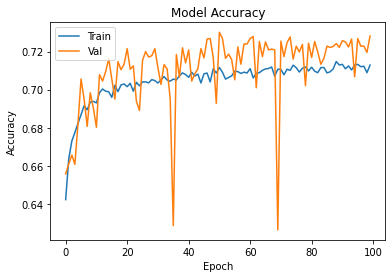

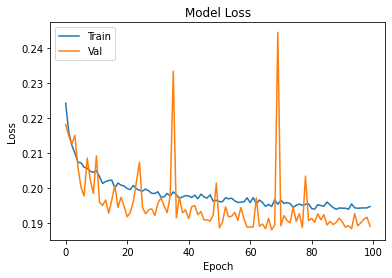

In [180]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [181]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.05%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [183]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.7866621077418277


In [184]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [186]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 92.72703215278084
Test Prediction Score 85.18257188216617


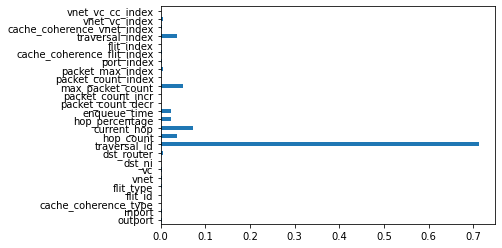

In [187]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

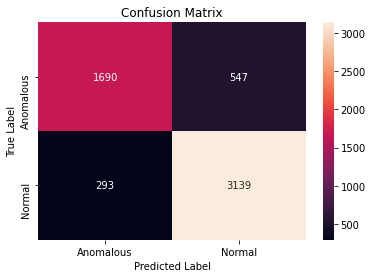

In [188]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [189]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2237
           1       0.85      0.91      0.88      3432

    accuracy                           0.85      5669
   macro avg       0.85      0.84      0.84      5669
weighted avg       0.85      0.85      0.85      5669



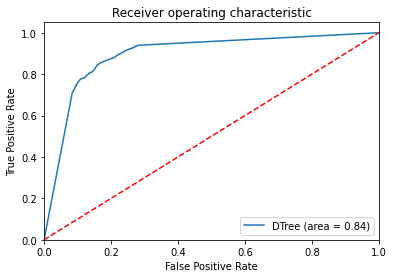

In [190]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250],
#            'max_features':range(0,25,2)}
#dt_g=RandomForestClassifier(random_state=42)
#dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
#dt_cv.fit(X_train,y_train)

#print("Best parameters:",dt_cv.best_params_)
#print("Accuracy :",dt_cv.best_score_)

In [193]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [195]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.00202884488158
Test Prediction Score 84.1594637502205


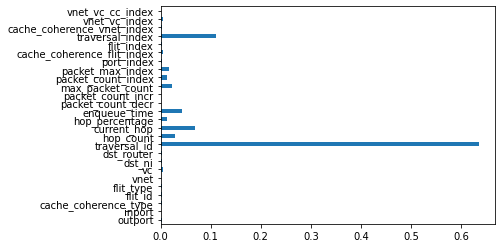

In [196]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

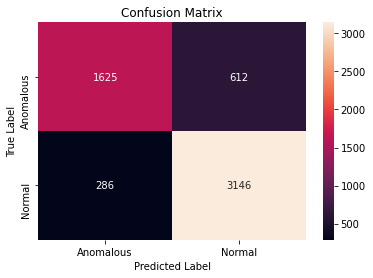

In [197]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [198]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78      2237
           1       0.84      0.92      0.88      3432

    accuracy                           0.84      5669
   macro avg       0.84      0.82      0.83      5669
weighted avg       0.84      0.84      0.84      5669



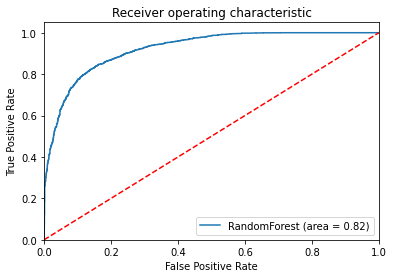

In [199]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250,500],
#           'min_child_weight':[1,3,6]}
#xgb_g=XGBClassifier(random_state=42)
#xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
#xgb_cv.fit(X_train,y_train)

#print("Best parameters:",xgb_cv.best_params_)
#print("Accuracy :",xgb_cv.best_score_)

In [202]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [204]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 98.6636086975698
Test Prediction Score 87.96965955194919


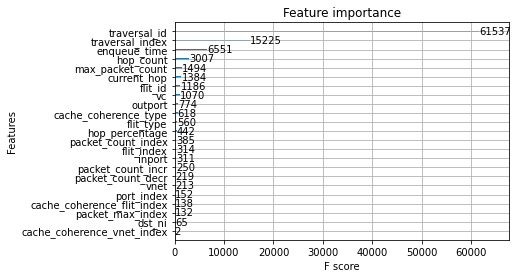

In [205]:
plot_importance(xgbc)
plt.show()

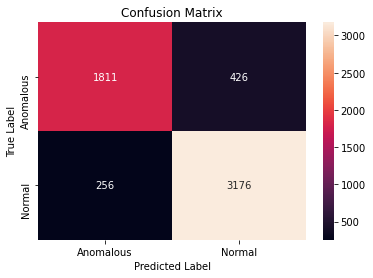

In [206]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [207]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      2237
           1       0.88      0.93      0.90      3432

    accuracy                           0.88      5669
   macro avg       0.88      0.87      0.87      5669
weighted avg       0.88      0.88      0.88      5669



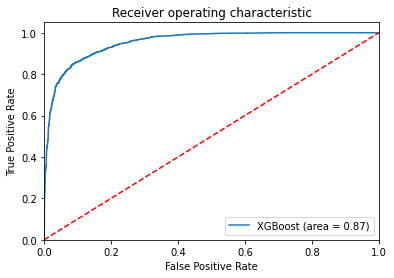

In [208]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
#param_grid = {'n_estimators': [x for x in range(24,40,2)],
#              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
#lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
#lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
#lgb_cv.fit(X_train, y_train)

#print("Best parameters:",lgb_cv.best_params_)
#print("Accuracy :",lgb_cv.best_score_)

In [211]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [213]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 82.73276584483747
Test Prediction Score 71.40589169165638


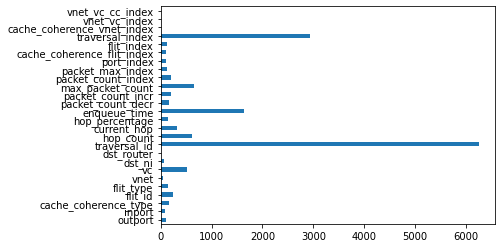

In [214]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

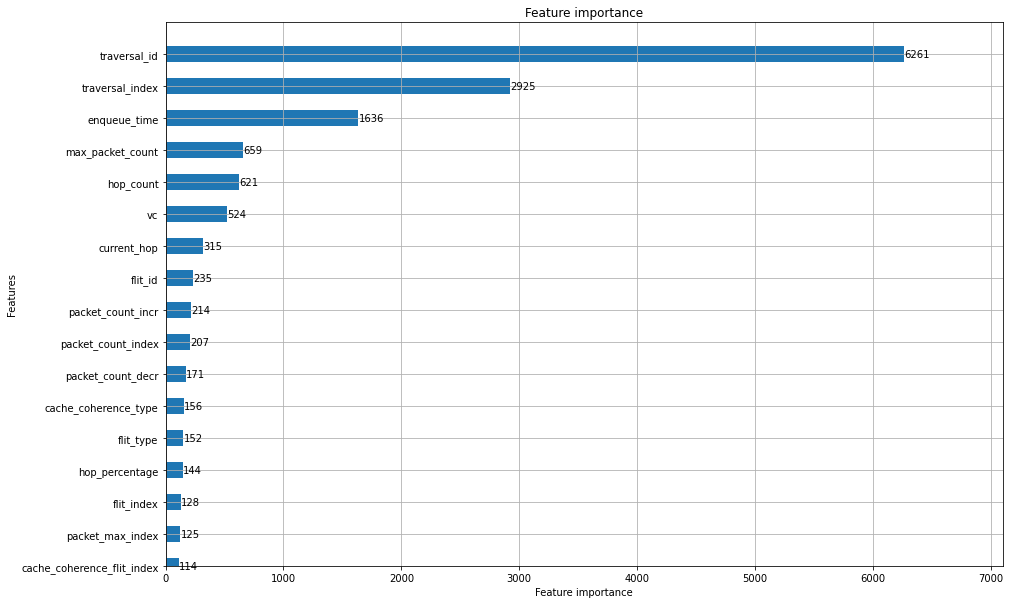

In [215]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,7100), ylim = (0,17), figsize = (15,10))
plt.show()

In [216]:
sorted(gbm.feature_importances_,reverse=True)

[6261,
 2925,
 1636,
 659,
 621,
 524,
 315,
 235,
 214,
 207,
 171,
 156,
 152,
 144,
 128,
 125,
 114,
 111,
 105,
 83,
 64,
 43,
 7,
 0,
 0,
 0]

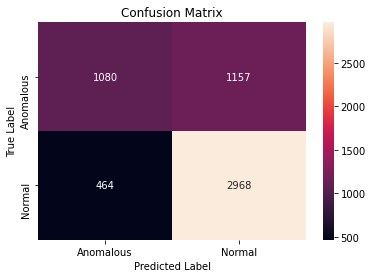

In [217]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [218]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57      2237
           1       0.72      0.86      0.79      3432

    accuracy                           0.71      5669
   macro avg       0.71      0.67      0.68      5669
weighted avg       0.71      0.71      0.70      5669



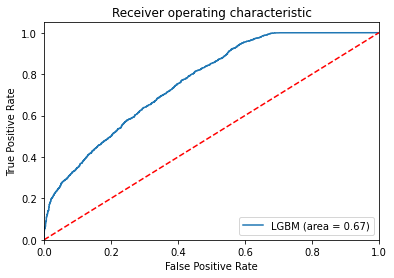

In [219]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()